#<font color='#97171e'>AIT - Master in Data Science</font> 📈
# **Module 8: Class 6 - Introduction to classification and Logistic Regression**
# Exercise Heart Disease

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things), we're going to predict when a person have heart disease or not

Original data can be found here: https://archive.ics.uci.edu/ml/datasets/heart+Disease

Also there is a reduced version (of columns) and formatted in: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

The data contains the following columns

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

The objectives in this exersice are:
* Explore the dataset
* Perform the data pre-processing
* Implement a Logistic Regression model.
* Evaluate the performance of the model.

## Solution

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox, probplot, norm, shapiro

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Files/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
for column_ in df.describe(include="object").columns:
    df[column_] = pd.Categorical(df[column_])

In [8]:
df.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_14384\3442718007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='BuPu');


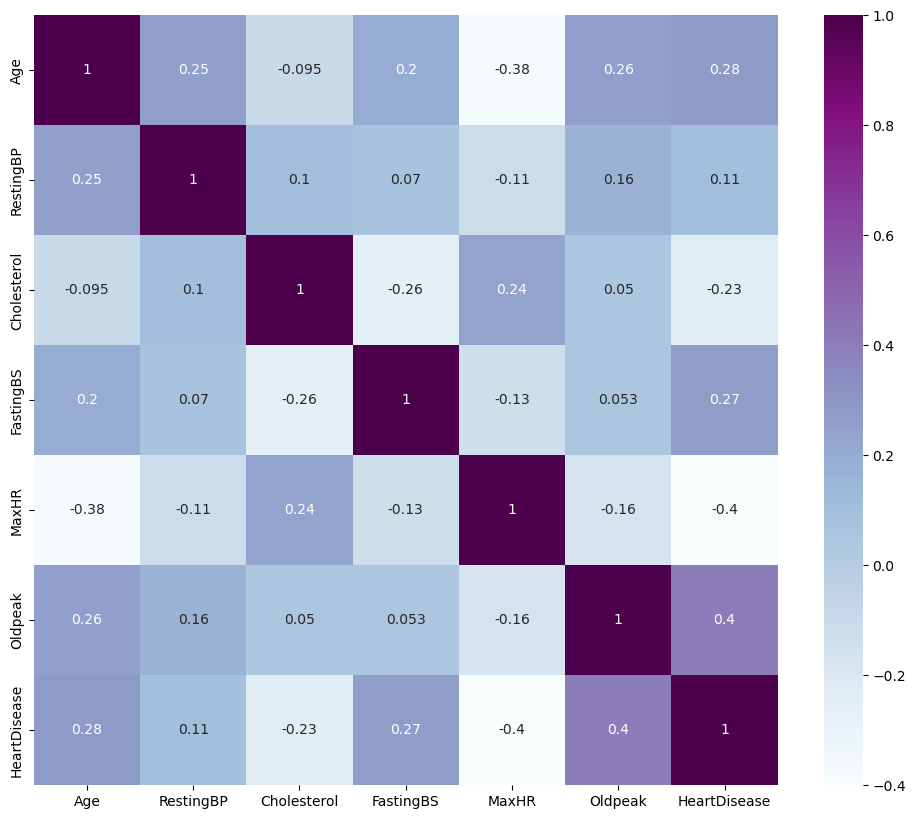

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='BuPu');

Text(0.5, 1.05, 'Porcentaje de personas con cardiopatías por cada variable - 0:No, 1:Sí')

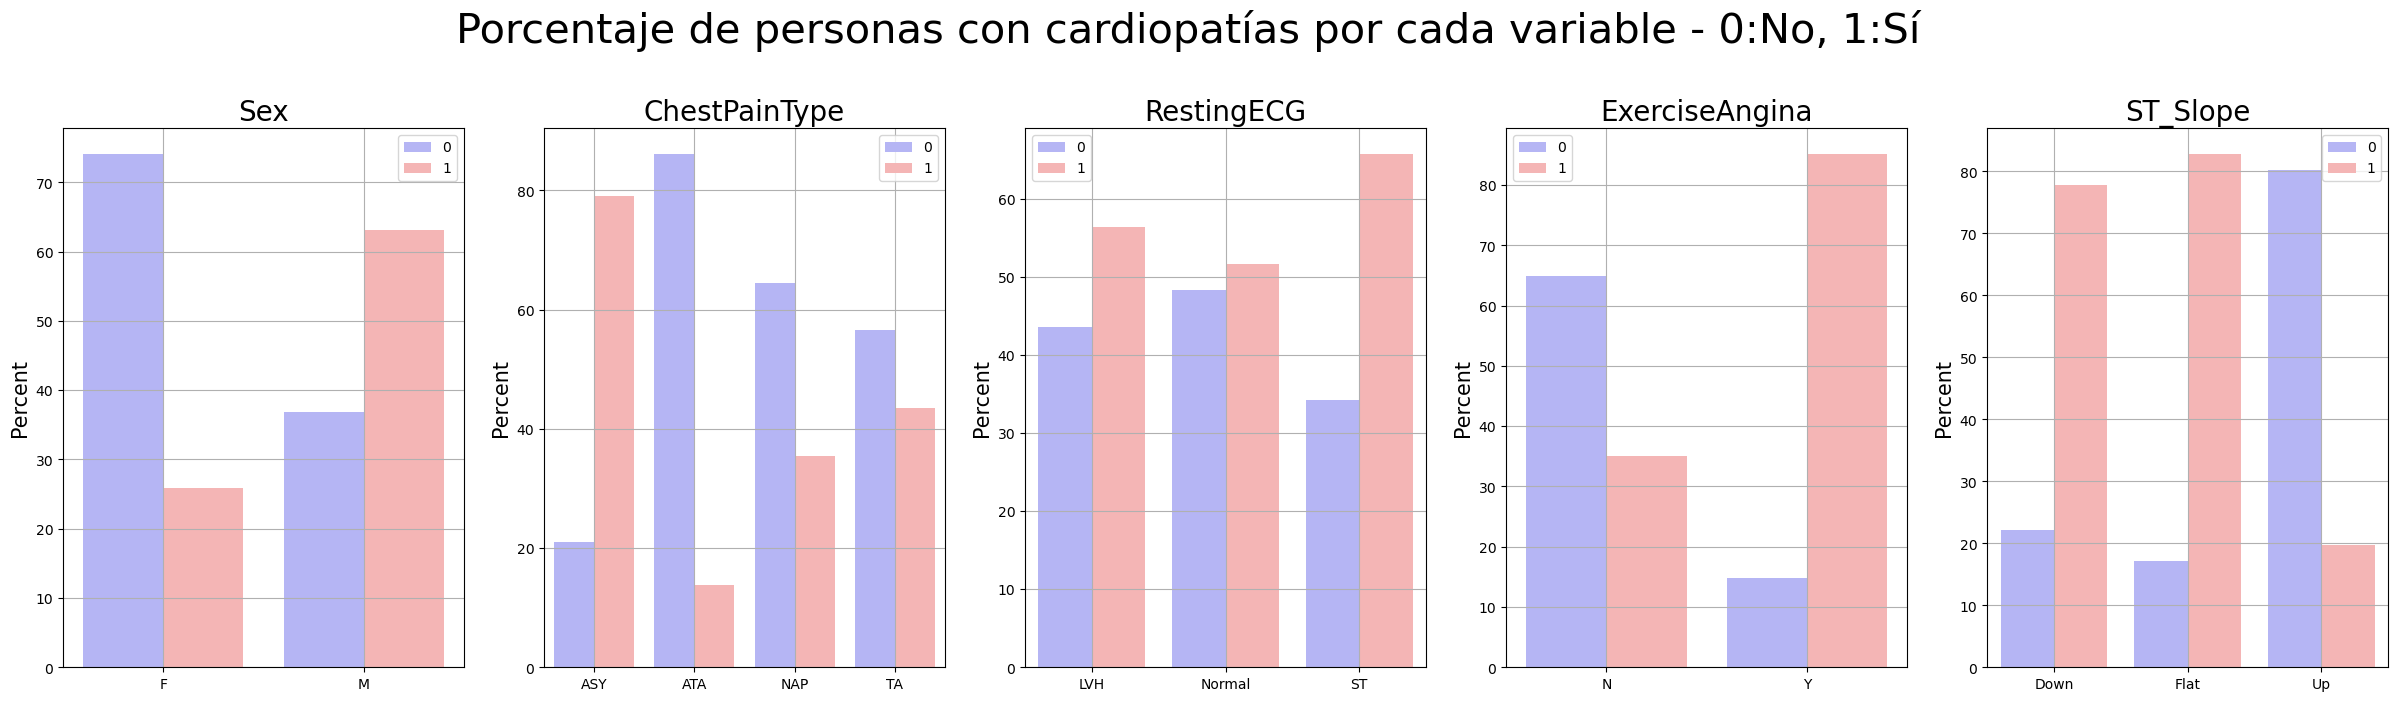

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(30, 7))
indexes = list(range(5))
col_dict = {indexes[i]: list(df.describe(include="category").columns)[i] for i in indexes}
for index, col in col_dict.items():
    df1=df.groupby(col)['HeartDisease'].value_counts(normalize=True)
    df1=df1.mul(100)
    df1=df1.rename('Percent').reset_index()
    sns.barplot(x=col, y='Percent',hue='HeartDisease', data=df1, ax=axes[index], palette='bwr');
    axes[index].set_xlabel('', fontsize=15)
    axes[index].set_ylabel('Percent', fontsize=15)
    axes[index].grid()
    axes[index].legend()
    axes[index].set_title(col, fontsize=20)
fig.suptitle('Porcentaje de personas con cardiopatías por cada variable - 0:No, 1:Sí', fontsize=30, y=1.05)

In [11]:
def check_outliers(df, cols, store=False):
    """
    La función toma un dataframe, una lista de columnas y un booleano store.
    Si store=False, solo imprime la cantidad de outliers que hay en cada columna de la lista.
    Si store=True, devuelve un diccionario que tiene como claves los nombres de las
    columnas y como valores los outliers de cada una de ellas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool

    Returns
    -------
    Si store=True:
        dict_outliers: dict
    """
    dict_outliers=dict()
    for cat in cols:
        df_cat = df[cat]
        Q1 = df_cat.quantile(0.25) # 1er cuartil
        Q3 = df_cat.quantile(0.75)# 2do cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5
        outliers = df_cat[~((df_cat >= Q1 - outlier_step) & (df_cat <= Q3 + outlier_step))].index.tolist()
        dict_outliers[cat]=outliers
        if not store:
            print('Para la variable {} hay {} outliers'.format(cat, len(outliers)))
    if store:
        return dict_outliers

In [12]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
check_outliers(df, num_col)

Para la variable Age hay 0 outliers
Para la variable RestingBP hay 28 outliers
Para la variable Cholesterol hay 183 outliers
Para la variable MaxHR hay 2 outliers
Para la variable Oldpeak hay 16 outliers


In [13]:
def remove_outliers(df, cols):
    """
    La función toma un dataframe y una lista de columnas.
    Droppea los outliers del dataframe en esas columnas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    """
    outliers = check_outliers(df, num_col, store=True)
    for cat in cols:
        df.drop(outliers[cat], inplace = True, errors = 'ignore')

In [14]:
remove_outliers(df, num_col)

## Preprocessing

In [15]:
y = df.HeartDisease.values # seleccionamos solo la columna HeartDisease para y que será nuestro target
X = df.drop(columns=['HeartDisease']) # dejamos el resto de las columnas en X

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

In [17]:
cats = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
encoder = OneHotEncoder(drop="first")  # aprendo las dummies de train
cats_train = encoder.fit_transform(X_train[cats]).toarray()

print(encoder.get_feature_names_out(cats))  # por las dudas chequeamos
cats_test = encoder.transform(X_test[cats]).toarray()  # no fit, ya aprendi el parámetro


['Sex_M' 'ChestPainType_ATA' 'ChestPainType_NAP' 'ChestPainType_TA'
 'RestingECG_Normal' 'RestingECG_ST' 'ExerciseAngina_Y' 'ST_Slope_Flat'
 'ST_Slope_Up']


In [18]:
nums = list(set(X_train.columns) - set(cats)) # obtenemos solo las columnas con variables numéricas
scaler = StandardScaler() # setteamos el scaler

# estandarizamos
nums_train = scaler.fit_transform(X_train[nums]) # estandarizamos train
nums_test = scaler.fit_transform(X_test[nums]) # estandarizamos test

# creamos los train y test set finales con todas las columnas categóricas y numéricas
X_train_final = np.concatenate([nums_train, cats_train], axis=1)
X_test_final = np.concatenate([nums_test, cats_test], axis=1)

## Modelo

In [19]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [20]:
# entrenamiento
logisticRegr.fit(X_train_final, y_train)

LogisticRegression(max_iter=10000)

## Evaluación

In [21]:
# performance
y_pred = logisticRegr.predict(X_test_final)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(X_test_final, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.89


In [22]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[65 11]
 [ 5 60]]


In [23]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.886525
Precision: 0.845070
Recall: 0.923077
F1 score: 0.882353


In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

In [25]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test_final)[:,1])

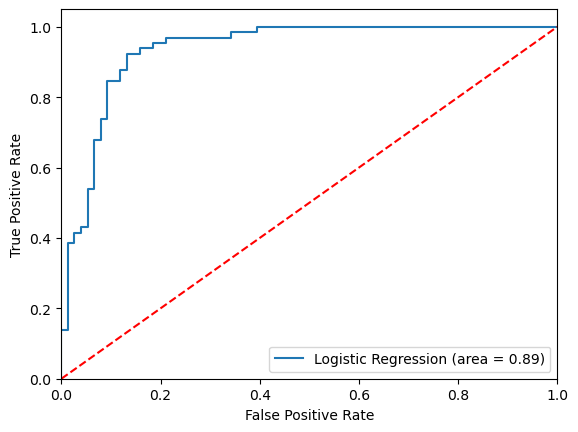

In [27]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()